In [1]:
1+1

2

# We are exploring the S&P 500 market index using basic time series analysis techniques just for fun.

We will test the exponential fit by fitting a regression line to the log transform and predict the upcoming cusp as of Mar 30 2024


In [2]:
# %pip install yfinance pandas seaborn matplotlib numpy statsmodels scipy scikit-learn dtale ipykernel ipywidgets bokeh jupyter_bokeh

In [3]:
# Importing the libraries, setting up the environment and downloading the data

import yfinance as yf
from datetime import date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import dtale
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool, CrosshairTool
from bokeh.io import output_notebook



# Setting up boken for jupyter notebook otuput instead of browser
output_notebook()



# Downloading S&P 500 data from Yahoo Finance
df = yf.download('^GSPC', '1931-01-01', '2024-03-28')

df['Day']= df.index

# convert the datetime index to ordinal values, which can be used to plot a regression line
df.index = df.index.map(pd.Timestamp.toordinal)

# Logarithmic transformation (assuming positive 'Close' values)
df['Log_Close'] = np.log(df['Close'])  

display(df.iloc[:, :])


Loading BokehJS ...

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                      
704919    15.850000    15.850000    15.850000    15.850000    15.850000   
704922    15.930000    15.930000    15.930000    15.930000    15.930000   
704923    16.129999    16.129999    16.129999    16.129999    16.129999   
704924    15.090000    15.090000    15.090000    15.090000    15.090000   
704925    16.230000    16.230000    16.230000    16.230000    16.230000   
...             ...          ...          ...          ...          ...   
738966  5253.430176  5261.100098  5240.660156  5241.529785  5241.529785   
738967  5242.479980  5246.089844  5229.870117  5234.180176  5234.180176   
738970  5219.520020  5229.089844  5216.089844  5218.189941  5218.189941   
738971  5228.850098  5235.160156  5203.419922  5203.580078  5203.580078   
738972  5226.310059  5249.259766  5213.919922  5248.490234  5248.490234   

            Volume        Day  Log_Close  
Date                                      
704919           0 1931-01-02   2.763170  
704922           0 1931-01-05   2.768204  
704923           0 1931-01-06   2.780681  
704924           0 1931-01-07   2.714032  
704925           0 1931-01-08   2.786861  
...            ...        ...        ...  
738966  4207730000 2024-03-21   8.564369  
738967  3374700000 2024-03-22   8.562966  
738970  3331360000 2024-03-25   8.559906  
738971  3871790000 2024-03-26   8.557102  
738972  3850500000 2024-03-27   8.565696  

[23424 rows x 8 columns]

Fitting the regression line

In [4]:
# convert the regression line start date to ordinal
x1 = pd.to_datetime('1932-01-01').toordinal()

# data slice for the regression line
data=df.loc[x1:].reset_index()

# create a linear regression model
model = LinearRegression()

# fit the model
model.fit(data[['Date']], data['Log_Close'])

slope = model.coef_[0]
intercept = model.intercept_
R2 = model.score(data[['Date']], data['Log_Close'])

equation = f'Lin_Regr_Log_Close = {slope:.4f} * Date {'+' if intercept >=0 else ''}{intercept:.4f}'


# make predictions
data['Linear'] = model.predict(data[['Date']])
data['Prediction_of_Close'] = np.exp(data['Linear'])



#print the model details including the slope, intercept, r-squared, and p-value, etc.
print('Slope:', slope)
print('Intercept:', intercept)
print('R-squared:', R2)

equation = f'Lin_Regr_Log_Close = {slope:.4f}*Date{'+' if intercept >=0 else ''}{intercept:.4f}'
print('The equation of the regression line is:', equation)

Slope: 0.0001901772302090598
Intercept: -132.2801903074971
R-squared: 0.9777985283548668
The equation of the regression line is: Lin_Regr_Log_Close = 0.0002*Date-132.2802


In [5]:
#Display the data

display(data.iloc[:, :])

Date         Open         High          Low        Close  \
0      705286     7.560000     7.560000     7.560000     7.560000   
1      705287     7.550000     7.550000     7.550000     7.550000   
2      705288     8.080000     8.080000     8.080000     8.080000   
3      705289     8.220000     8.220000     8.220000     8.220000   
4      705290     8.570000     8.570000     8.570000     8.570000   
...       ...          ...          ...          ...          ...   
23167  738966  5253.430176  5261.100098  5240.660156  5241.529785   
23168  738967  5242.479980  5246.089844  5229.870117  5234.180176   
23169  738970  5219.520020  5229.089844  5216.089844  5218.189941   
23170  738971  5228.850098  5235.160156  5203.419922  5203.580078   
23171  738972  5226.310059  5249.259766  5213.919922  5248.490234   

         Adj Close      Volume        Day  Log_Close    Linear  \
0         7.560000           0 1932-01-04   2.022871  1.849148   
1         7.550000           0 1932-01-05   2.021548  1.849338   
2         8.080000           0 1932-01-06   2.089392  1.849528   
3         8.220000           0 1932-01-07   2.106570  1.849718   
4         8.570000           0 1932-01-08   2.148268  1.849908   
...            ...         ...        ...        ...       ...   
23167  5241.529785  4207730000 2024-03-21   8.564369  8.254317   
23168  5234.180176  3374700000 2024-03-22   8.562966  8.254507   
23169  5218.189941  3331360000 2024-03-25   8.559906  8.255078   
23170  5203.580078  3871790000 2024-03-26   8.557102  8.255268   
23171  5248.490234  3850500000 2024-03-27   8.565696  8.255458   

       Prediction_of_Close  
0                 6.354401  
1                 6.355610  
2                 6.356819  
3                 6.358028  
4                 6.359237  
...                    ...  
23167          3844.184597  
23168          3844.915743  
23169          3847.110016  
23170          3847.841718  
23171          3848.573559  

[23172 rows x 11 columns]

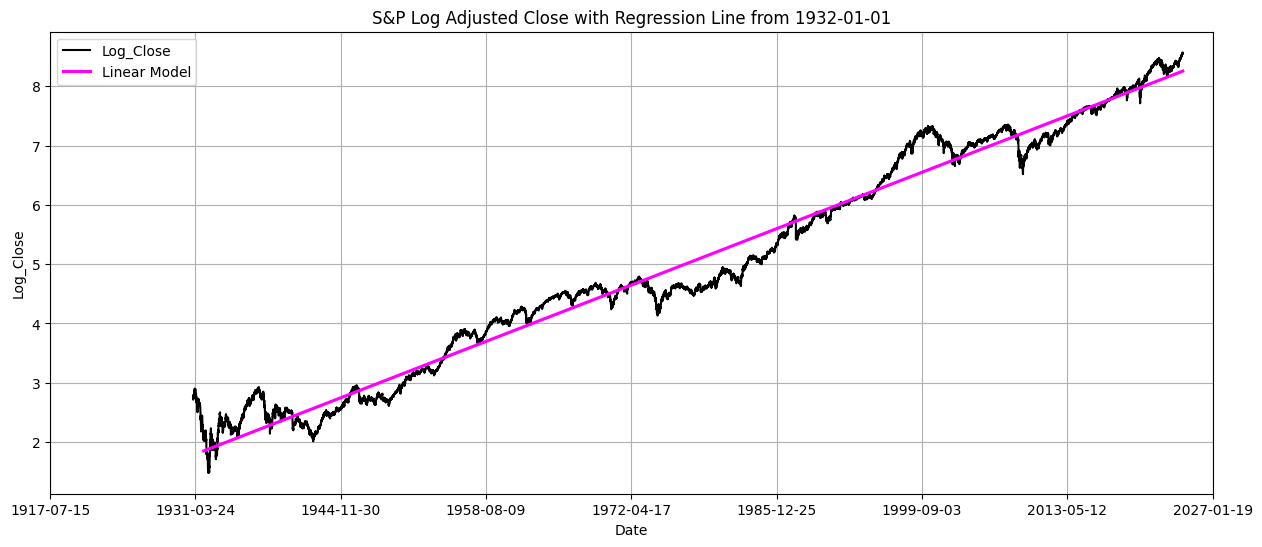

In [6]:

# convert the regression line start date to ordinal
x1 = pd.to_datetime('1932-01-01').toordinal()

# data slice for the regression line
data=df.loc[x1:].reset_index()

# plot the log Close data
ax1 = df.plot(y='Log_Close', c='k', figsize=(15, 6), grid=True, legend=False,
              title='S&P Log Adjusted Close with Regression Line from 1932-01-01')

# add a regression line
sns.regplot(data=data, x='Date', y='Log_Close', ax=ax1, color='magenta', scatter_kws={'s': 7}, label='Linear Model', scatter=False)

ax1.set_xlim(df.index[0], df.index[-1])

# convert the axis back to datetime
xticks = ax1.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)

ax1.legend()

plt.show()

Plot in seaborn

ValueError: Could not interpret value `Linear` for `y`. An entry with this name does not appear in `data`.

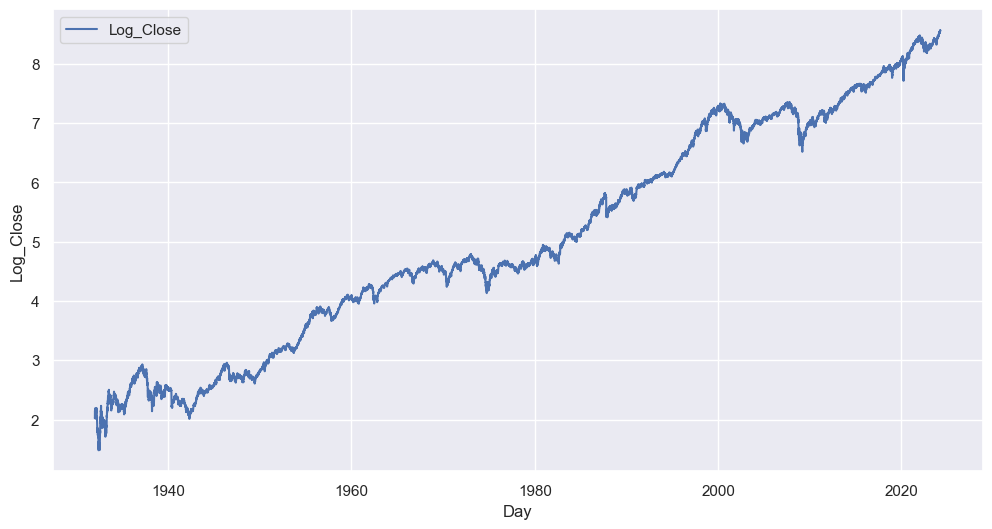

In [7]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Log_Close', data=data, label='Log_Close')
sns.lineplot(x='Day', y='Linear', data=data, label='Linear Regression')
plt.title('S&P 500 Index (1931-2024)')
plt.xlabel('Year')
plt.ylabel('Log S&P 500 Index')
plt.legend()

# Add the equation of the line

plt.annotate(equation, xy=(0.5, 0.5), xycoords='axes fraction', fontsize=24, ha='center')
2
plt.show()




## Making a dynamic version of the plot using Bokeh

In [ ]:
# adding column selection to the plot_regression_line function
def plot_regression_line(data, equation, title='S&P 500 Index (1931-2024)', cols=['Day', 'Log_Close', 'Linear']):
    # Create a new figure
    p = figure(title=title, x_axis_label='Year', y_axis_label='Log S&P 500 Index', width=1000, height=600, x_axis_type='datetime')

    # Define the source variable
    source = ColumnDataSource(data=data)

    # Plot the lines
    for i in range(1, len(cols)):
        p.line(x=cols[0], y=cols[i], source=source, line_width=2, legend_label=cols[i])

    # Add hover functionality
    hover_tool = HoverTool(tooltips=[('Year', '@' + cols[0] + '{%F}'), (cols[1], '@' + cols[1] + '{0,0.00}'), (cols[2], '@' + cols[2] + '{0,0.00}')], formatters={'@' + cols[0]: 'datetime'})
    p.add_tools(hover_tool)

    # Add the equation of the regression line
    p.text(x=0.1, y=0.1, text=[equation], text_font_size='24pt', text_align='center')

    # Format the y-axis tick labels
    p.yaxis.formatter = NumeralTickFormatter(format='0,0.00')

    # Relocate the legend to top left
    p.legend.location = 'top_left'

    # Show the plot
    output_notebook()
    show(p)



plot_regression_line(data, equation)

Loading BokehJS ...

We extend daily till year_future year and predict 

In [ ]:
data['Day'].max()

Timestamp('2024-03-27 00:00:00')

In [ ]:
#We extend daily intil the year year_future forward  
# create a new dataframe for the future dates
year_future = 2030

today = date.today()

# convert the 'Day' column to datetime
data['Day'] = pd.to_datetime(data['Day'])

delta_years = year_future - data['Day'].max().year
future_dates = pd.date_range(start=data['Day'].max(), periods=delta_years*365, freq='D')


print(future_dates)

# convert the future dates to ordinal
future_dates_od = future_dates.map(pd.Timestamp.toordinal)
print(future_dates_od)

# convert future_dates to a numpy array
future_dates_od_np = np.array(future_dates_od)
print(future_dates_od_np)


#create a new dataframe for the future dates and add above 3 columns
future_data = pd.DataFrame(future_dates, columns=['Day'])
future_data['Day_od'] = future_dates_od

#predict the S&P 500 index using the linear regression model and add to the dataframe
future_data['Linear'] = model.predict(future_dates_od_np.reshape(-1, 1))
future_data['Prediction_of_Close'] = np.exp(future_data['Linear'])

display(future_data.iloc[:, :])

DatetimeIndex(['2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05',
               ...
               '2030-03-16', '2030-03-17', '2030-03-18', '2030-03-19',
               '2030-03-20', '2030-03-21', '2030-03-22', '2030-03-23',
               '2030-03-24', '2030-03-25'],
              dtype='datetime64[ns]', length=2190, freq='D')
Index([738972, 738973, 738974, 738975, 738976, 738977, 738978, 738979, 738980,
       738981,
       ...
       741152, 741153, 741154, 741155, 741156, 741157, 741158, 741159, 741160,
       741161],
      dtype='int64', length=2190)
[738972 738973 738974 ... 741159 741160 741161]


/Users/norayr/.pyenv/versions/3.12.0/envs/Market/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Day  Day_od    Linear  Prediction_of_Close
0    2024-03-27  738972  8.255458          3848.573559
1    2024-03-28  738973  8.255648          3849.305540
2    2024-03-29  738974  8.255838          3850.037660
3    2024-03-30  738975  8.256028          3850.769919
4    2024-03-31  738976  8.256219          3851.502317
...         ...     ...       ...                  ...
2185 2030-03-21  741157  8.670995          5831.299204
2186 2030-03-22  741158  8.671185          5832.408290
2187 2030-03-23  741159  8.671375          5833.517587
2188 2030-03-24  741160  8.671566          5834.627094
2189 2030-03-25  741161  8.671756          5835.736813

[2190 rows x 4 columns]

In [ ]:
# Concatenate the original data frame and the future data frame
extended_df = pd.concat([df, future_data[['Day', 'Prediction_of_Close']]])

# add day ordinal to the extended dataframe
extended_df['Day_od'] = extended_df['Day'].apply(pd.to_datetime).apply(pd.Timestamp.toordinal)

# add the regression line to the extended dataframe
extended_df['Linear'] = model.predict(np.array(extended_df[['Day_od']]).reshape(-1, 1))

# add the prediction of the close to the extended dataframe
extended_df['Prediction_of_Close'] = np.exp(extended_df['Linear'])

# Display the extended data frame
display(extended_df.iloc[:, :])

/Users/norayr/.pyenv/versions/3.12.0/envs/Market/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Open       High        Low      Close  Adj Close  Volume  \
704919  15.850000  15.850000  15.850000  15.850000  15.850000     0.0   
704922  15.930000  15.930000  15.930000  15.930000  15.930000     0.0   
704923  16.129999  16.129999  16.129999  16.129999  16.129999     0.0   
704924  15.090000  15.090000  15.090000  15.090000  15.090000     0.0   
704925  16.230000  16.230000  16.230000  16.230000  16.230000     0.0   
...           ...        ...        ...        ...        ...     ...   
2185          NaN        NaN        NaN        NaN        NaN     NaN   
2186          NaN        NaN        NaN        NaN        NaN     NaN   
2187          NaN        NaN        NaN        NaN        NaN     NaN   
2188          NaN        NaN        NaN        NaN        NaN     NaN   
2189          NaN        NaN        NaN        NaN        NaN     NaN   

              Day  Log_Close  Prediction_of_Close  Day_od    Linear  
704919 1931-01-02   2.763170             5.926019  704919  1.779353  
704922 1931-01-05   2.768204             5.929401  704922  1.779923  
704923 1931-01-06   2.780681             5.930529  704923  1.780113  
704924 1931-01-07   2.714032             5.931657  704924  1.780304  
704925 1931-01-08   2.786861             5.932785  704925  1.780494  
...           ...        ...                  ...     ...       ...  
2185   2030-03-21        NaN          5831.299204  741157  8.670995  
2186   2030-03-22        NaN          5832.408290  741158  8.671185  
2187   2030-03-23        NaN          5833.517587  741159  8.671375  
2188   2030-03-24        NaN          5834.627094  741160  8.671566  
2189   2030-03-25        NaN          5835.736813  741161  8.671756  

[25614 rows x 11 columns]

In [ ]:

plot_regression_line(data, equation)

Loading BokehJS ...

In [ ]:
# plotting the extended data frame using the plot_regression_line function
plot_regression_line(extended_df, equation, title=f'S&P 500 Index (1931-{year_future})', cols = ['Day', 'Close', 'Prediction_of_Close'])


Loading BokehJS ...

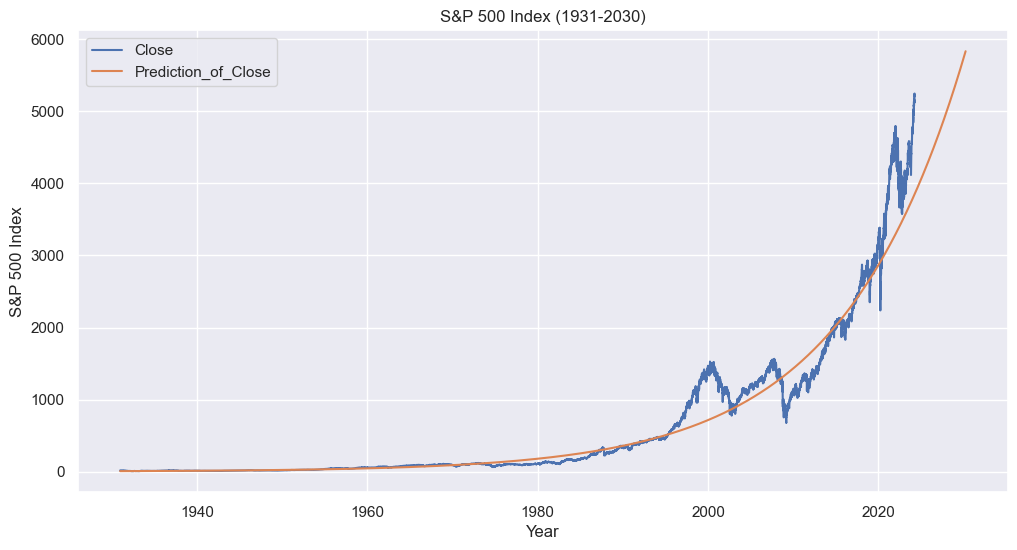

In [ ]:
# plot the original data and the extended data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Close', data=extended_df, label='Close')
sns.lineplot(x='Day', y='Prediction_of_Close', data=extended_df, label='Prediction_of_Close')
plt.title(f'S&P 500 Index (1931-{year_future})')
plt.xlabel('Year')
plt.ylabel('S&P 500 Index')
plt.legend()
plt.show()


In [ ]:
# D-Tale
d = dtale.show(df, host='localhost')   

## The Slope from 2009 looks different, let's fit a linear regression model to the data from 2009 to 2024

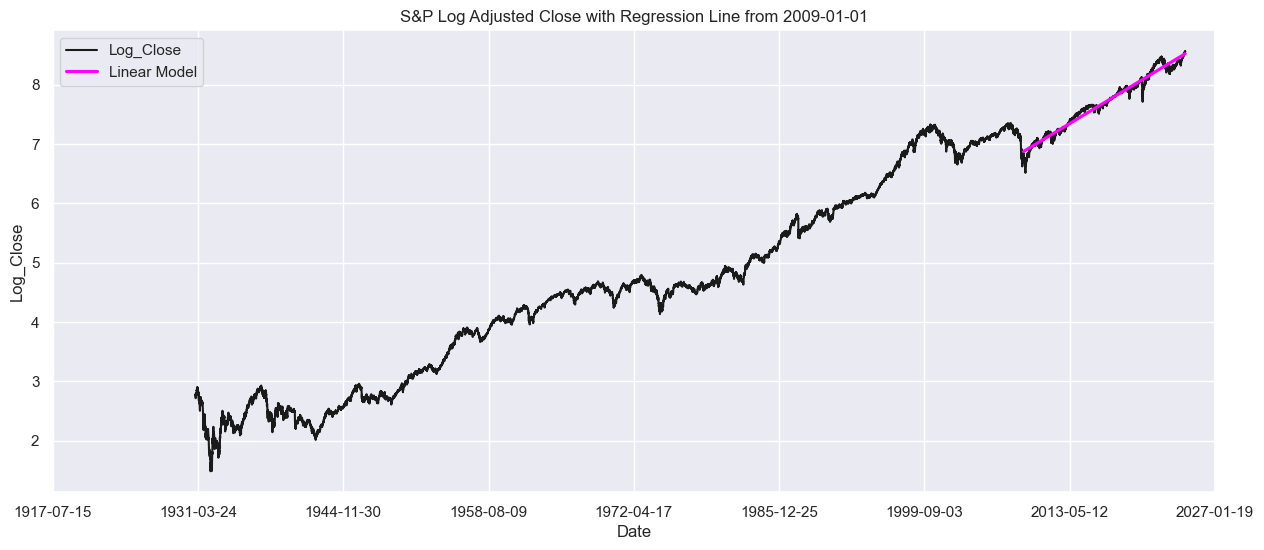

In [ ]:


# convert the regression line start date to ordinal
x1 = pd.to_datetime('2009-01-01').toordinal()

# data slice for the regression line
data=df.loc[x1:].reset_index()

# plot the log Close data
ax1 = df.plot(y='Log_Close', c='k', figsize=(15, 6), grid=True, legend=False,
              title='S&P Log Adjusted Close with Regression Line from 2009-01-01')

# add a regression line
sns.regplot(data=data, x='Date', y='Log_Close', ax=ax1, color='magenta', scatter_kws={'s': 7}, label='Linear Model', scatter=False)

ax1.set_xlim(df.index[0], df.index[-1])

# convert the axis back to datetime
xticks = ax1.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).date() for label in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)

ax1.legend()

plt.show()
